# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [25]:
from __future__ import print_function, division

import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')
df.head(1)

,temperature,gender,heart_rate
0,99.3,F,68.0


In [9]:
avg_temp = df.temperature.mean()
temp_std = df.temperature.std()

def sdp(zscore):
    more = avg_temp + (temp_std * zscore)
    less = avg_temp - (temp_std * zscore)
    temp_range = (df['temperature'] < more) & (df['temperature'] > less)
    
    count = df.loc[temp_range]['temperature'].count()
    
    return count/130

In [10]:
one_sdp = sdp(1)
two_sdp = sdp(2)
three_sdp = sdp(3)

sdp_range = '{} - {} - {}'.format(one_sdp, two_sdp, three_sdp)
sdp_range

'0.6923076923076923 - 0.9461538461538461 - 0.9923076923076923'

# 1. *The distribution is normal because the percent of the sample within 1, 2, and 3 standard deviations from the mean is about 69%, 95%, and 99.7% as mentioned above.*

# 2. *The sample size is larger, because there are 130 observations, well over 30 observations neccessary to be considered large.*

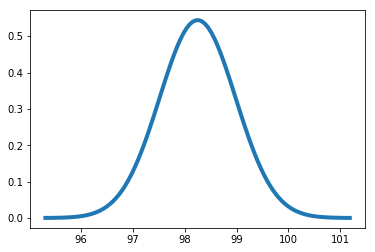

In [11]:
# Sample of 130 people
temp_dist = scipy.stats.norm(avg_temp, temp_std)

def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = np.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

xs, ys = eval_pdf(temp_dist)
plt.plot(xs, ys, label='male', linewidth=4)
plt.show()

### 1) Repeat sample model 10000 times and get a distribution of sampling means
### 2) The mean of that distribution should be very close to the true mean
### 3) Get standard deviation of population by dividing std of sample by sqrt of sample size

In [17]:
pop_std = temp_std/130**.5
pop_std

0.06430441683789101

### Get distribution of sample means, resampled 10000 times.

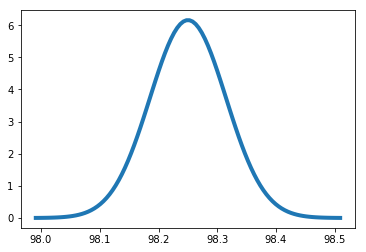

In [23]:
def summarize_sampling_distribution(sample_stats):
    print('SE', sample_stats.std())
    print('90% CI', np.percentile(sample_stats, [5, 95]))
    
def create_sampling_dist(sample, resamples=1000):
    sample_means = [np.random.choice(sample, len(sample), replace=True).mean() for i in range(resamples)]
    return np.array(sample_means)

sample_means = create_sampling_dist(df.temperature, 10000)
sm_dev = sample_means.std()
sm_mean = sample_means.mean()

sm_dist = scipy.stats.norm(sm_mean, sm_dev)

xs, ys = eval_pdf(sm_dist)
plt.plot(xs, ys, label='sample statistic', linewidth=4)
plt.show()

In [24]:
x = temp_std/130**.5
y = x * 2.58
high_confidence_pop_mean = '{} - {}'.format(avg_temp - y, avg_temp + y)
high_confidence_pop_mean

'98.08332537378902 - 98.41513616467253'

# 3 * The true population mean is probably not 98.6 degrees, since based on the distribution of 10,000 resampled means, we can be 99% confident that the mean of the true population lies somewhere between 98.08 and 98.41 degrees. *
    * In this case since we have a sample that is not only over 30, but also over 100, it is safe to say that we can use Z-Stats. T-Stats are only for very small samples

# Tasks to do while at work
* Do Khan Academy Stats courses over again, and take really good notes !!!!
* Find out what the difference is between a one sample and two sample test ?
* Find out how to use T-Stats with SciPy.stats

* Get confidence interval, and margin of error for above distribution.

* Find out how to tell the difference between Male and Female "Khan Academy"